In [17]:
import pandas as pd
import numpy as np


In [18]:


df1 = pd.read_csv("pvr.csv", encoding='latin1') 
df1


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [19]:


df2 = pd.read_csv("ratin.csv", encoding='latin1')  


In [20]:
df2

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [22]:
final_dataset = df2.pivot(index="movieId", columns="userId", values="rating")
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
final_dataset.fillna(0, inplace=True)

In [24]:
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
no_user_voted = df2.groupby("movieId")['rating'].agg('count')
no_movies_voted = df2.groupby("userId")['rating'].agg('count')

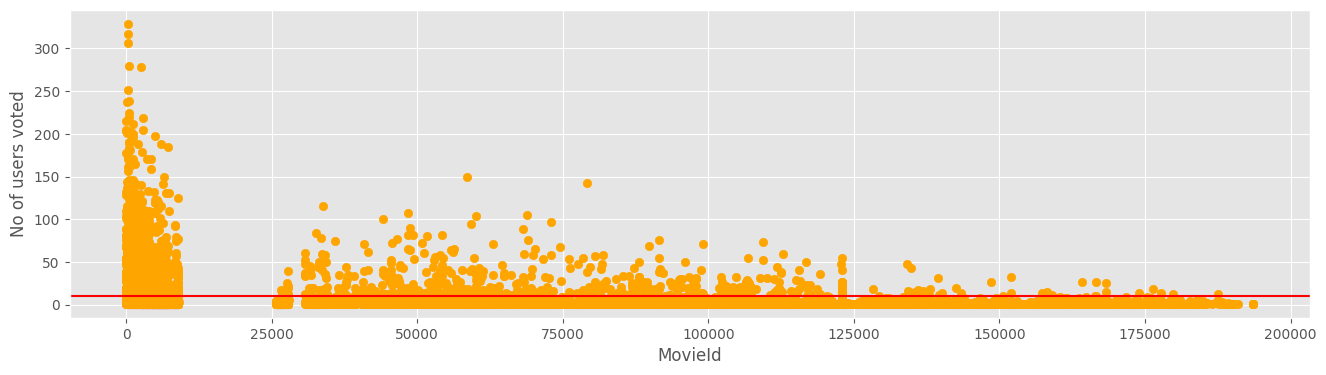

In [30]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,1, figsize=(16,4))
plt.scatter(no_user_voted.index, no_user_voted, color="orange")
plt.axhline(y=10, color='red')
plt.xlabel("MovieId")
plt.ylabel("No of users voted")
plt.show()

In [31]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index, :]

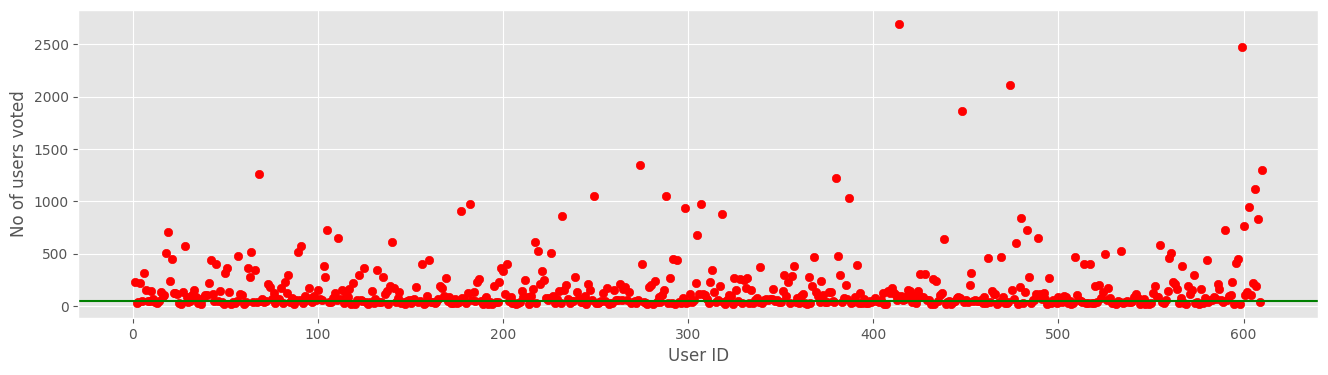

In [33]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,1, figsize=(16,4))
plt.scatter(no_movies_voted.index, no_movies_voted, color="red")
plt.axhline(y=50, color='green')
plt.xlabel("User ID")
plt.ylabel("No of users voted")
plt.show()

In [34]:
sample = np.array([[1,0,0,0,0], [0,0,2,0,0], [0,0,4,0,0]])
sparsity = 1.0 - (np.count_nonzero(sample) / float(sample.size))
print(sparsity)

0.8


In [35]:
from scipy.sparse import csr_matrix
csr_sample = csr_matrix(sample)
print(csr_sample)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (3, 5)>
  Coords	Values
  (0, 0)	1
  (1, 2)	2
  (2, 2)	4


In [36]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [37]:
print(csr_data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 79636 stored elements and shape (2121, 610)>
  Coords	Values
  (0, 0)	4.0
  (0, 4)	4.0
  (0, 6)	4.5
  (0, 14)	2.5
  (0, 16)	4.5
  (0, 17)	3.5
  (0, 18)	4.0
  (0, 20)	3.5
  (0, 26)	3.0
  (0, 30)	5.0
  (0, 31)	3.0
  (0, 32)	3.0
  (0, 39)	5.0
  (0, 42)	5.0
  (0, 43)	3.0
  (0, 44)	4.0
  (0, 45)	5.0
  (0, 49)	3.0
  (0, 53)	3.0
  (0, 56)	5.0
  (0, 62)	5.0
  (0, 63)	4.0
  (0, 65)	4.0
  (0, 67)	2.5
  (0, 70)	5.0
  :	:
  (2118, 600)	4.5
  (2119, 61)	3.5
  (2119, 97)	3.0
  (2119, 152)	0.5
  (2119, 209)	4.5
  (2119, 248)	4.5
  (2119, 379)	0.5
  (2119, 413)	4.5
  (2119, 513)	2.0
  (2119, 514)	4.0
  (2119, 566)	2.0
  (2119, 585)	5.0
  (2119, 595)	3.5
  (2120, 24)	5.0
  (2120, 61)	4.0
  (2120, 97)	5.0
  (2120, 232)	2.5
  (2120, 247)	4.5
  (2120, 248)	5.0
  (2120, 304)	5.0
  (2120, 330)	4.0
  (2120, 337)	1.0
  (2120, 379)	3.0
  (2120, 513)	3.5
  (2120, 585)	4.0


In [38]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm = 'brute', n_neighbors = 20, n_jobs = -1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [39]:
def get_recommendation(movie_name):
    movie_list = df1[df1['title'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx = movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distance, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=11)
        rec_movies_indices = sorted(list(zip(indices.squeeze().tolist(), distance.squeeze().tolist())), key=lambda x: x[1])[:0: -1]
        recommended_movies = []
        for val in rec_movies_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = df1[df1['movieId'] == movie_idx].index
            recommended_movies.append({'Title': df1.iloc[idx]['title'].values[0], 'Distance': val[1]})
        df = pd.DataFrame(recommended_movies, index=range(1, 11))
        return df
    else:
        return "Movie not found..."

In [40]:
get_recommendation("Avatar")

,Title,Distance
1,I Am Legend (2007),0.447392
2,Sherlock Holmes (2009),0.444272
3,"Avengers, The (2012)",0.440447
4,Harry Potter and the Half-Blood Prince (2009),0.426318
5,Kung Fu Panda (2008),0.413092
6,"Hangover, The (2009)",0.398295
7,WALL·E (2008),0.397135
8,District 9 (2009),0.388001
9,Iron Man (2008),0.375732
10,Up (2009),0.365445


In [ ]:
import gradio as gr

def recommend_movies(movie_name):
    df = get_recommendation(movie_name)
    if isinstance(df, pd.DataFrame):
        return df.to_string(index=False)
    else:
        return df
app = gr.Interface(
    fn = recommend_movies, 
    inputs = "text",
    outputs = "text", 
    title = "Movie Recommendation System",
    description = "Enter a movie name to get a list of recommended movies"
)

app.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\archi\AppData\Roaming\Python\Python312\site-packages\gradio\queueing.py", line 626, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\archi\AppData\Roaming\Python\Python312\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\archi\AppData\Roaming\Python\Python312\site-packages\gradio\blocks.py", line 2220, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\archi\AppData\Roaming\Python\Python312\site-packages\gradio\blocks.py", line 1731, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\archi\AppData\Roaming\Python\Python312\site-packages\anyio\to_thr

In [42]:
pip install gradio

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/54.3 MB ? eta -:--:--
   --- ------------------------------------ 4.5/54.3 MB 22.4 MB/s eta 0:00:03
   ------- -------------------------------- 9.7/54.3 MB 24.2 MB/s eta 0:00:02
   --------- ------------------------------ 13.4/54.3 MB 22.7 MB/s eta 0:00:02
   ------------ --------------------------- 17.3/54.3 MB 21.4 MB/s eta 0:00:02
   --------------- ------------------------ 21.5/54.3 MB 20.9 MB/s eta 0:00:02
   ------------------ --------------------- 25.4/54.3 MB 20.7 MB/s eta 0:00:02
   --------------------- ------------------ 29.4/54.3 MB 20.5 MB/s eta 0:00:02
   ------------------------ --------------- 33.6/54.3 MB 20.3 MB/s eta 0:00:02
   --------------------------- ------------ 37.5/54.3 MB 20.2 MB/s eta 0:00:01
   ------------------------------ --------- 41.7/54.3 MB 20.1 MB/s eta 0:00:01
   --------------------------------- ------ 45.6/54.3 MB 20.0 MB


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
